In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel, cmdstan_path
import pickle
import json
from sklearn.preprocessing import PowerTransformer, StandardScaler
import arviz as az
import pystan
from sklearn.metrics import mean_squared_error

In [2]:
y_data_raw = pd.read_csv("../data/y_count_original.csv")
y_data_raw.drop(columns=["age"], inplace=True)
y_data_raw

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,113.0,21.0,54.0,80.0,NaN,NaN,54.0,14.0,20.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,56.0,13.0,15.0,40.0,NaN,81.0,32.0,50.0,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,11.0,NaN,20.0,NaN,30.0,57.0,80.0,33.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.0,71.0,NaN,69.0,22.0,NaN,41.0,43.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,53.0,NaN,100.0,NaN,NaN,NaN,3.0,NaN,12.0
6,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,...,97.0,38.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,3.0,3.0,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
np.max(y_data_raw.values.flatten()[~np.isnan(y_data_raw.values.flatten())])

312.0

In [4]:
# DDH, FF + PCC, PKM, PKG, FFG
ship_column_index = [(1, 7), (8, 33), (34, 76), (77, 95), (96, 99)]
engine_types = {
    1 : "MTU 20V 956 TB92",
    2 : "GE LM2500",
    3 : "MTU 20V 538 TU90",
    4 : "MTU 16V 1163 TB93"
}
ship_full_displacement = [5520, 3100, 170, 570, 3300]
engine_count = [2,2,2,2,2]
ship_engine_type = [1, 2, 3, 4, 2]
ship_service_year = [2003, 1988, 1993, 2008, 2013]
propulsion_system = ["CODOG", "CODOG", "CODAD", "CODAG", "CODOG"]
complexity = {
    "CODOG" : 1.0,
    "CODAG" : 1.0,
    "CODAD" : 1.3,
}

In [5]:
relative_displacement = {}
engine_type = {}
ship_complexity_data = {}
ship_number = {}
for ship in y_data_raw.columns:
    shipnum = int(ship[1:])
    for i, (l, u) in enumerate(ship_column_index):
        if shipnum >= l and shipnum <= u:
            data_index = i
            break
    
    relative_displacement[f"s{shipnum}"] = np.round(ship_full_displacement[i] / np.min(ship_full_displacement), decimals=4)
    engine_type[f"s{shipnum}"] = ship_engine_type[i]
    ship_complexity_data[f"s{shipnum}"] = complexity[propulsion_system[i]]
    ship_number[f"s{shipnum}"] = shipnum

In [6]:
relative_displacement_df = pd.DataFrame({key: np.tile(val, y_data_raw.shape[0]) for key, val in relative_displacement.items()})
engine_type_df = pd.DataFrame({key: np.tile(val, y_data_raw.shape[0]) for key, val in engine_type.items()})
ship_complexity_df = pd.DataFrame({key: np.tile(val, y_data_raw.shape[0]) for key, val in ship_complexity_data.items()})
ship_number_df = pd.DataFrame({key: np.tile(val, y_data_raw.shape[0]) for key, val in ship_number.items()})

In [7]:
y_data_raw = y_data_raw.loc[:, ((~y_data_raw.isnull()).sum(axis=0) >= 4)]

In [8]:
y_data_raw.columns

Index(['s1', 's2', 's3', 's5', 's8', 's9', 's11', 's12', 's13', 's15', 's17',
       's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27',
       's28', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37',
       's38', 's39', 's40', 's41', 's42', 's43', 's44', 's45', 's46', 's47',
       's48', 's49', 's50', 's51', 's52', 's53', 's54', 's55', 's56', 's57',
       's58', 's59', 's61', 's62', 's63', 's64', 's65', 's66', 's67', 's68',
       's69', 's70', 's71', 's72', 's77', 's78', 's79', 's80', 's81', 's82',
       's83', 's84', 's85', 's86', 's87', 's89', 's90', 's91', 's93', 's97',
       's99'],
      dtype='object')

In [9]:
relative_displacement_df = relative_displacement_df[y_data_raw.columns.tolist()]
engine_type_df = engine_type_df[y_data_raw.columns.tolist()]
ship_complexity_df = ship_complexity_df[y_data_raw.columns.tolist()]
ship_number_df = ship_number_df[y_data_raw.columns.tolist()]
age_df = pd.DataFrame(columns=y_data_raw.columns.tolist())
for x in range(31):
    age_df.loc[x] = np.tile((x)/30, age_df.shape[1])

In [10]:
y_data = y_data_raw.values[~np.isnan(y_data_raw.values)].astype(np.int32)
ship_complexity_data = ship_complexity_df.values[~np.isnan(y_data_raw.values)]
ship_age_data = age_df.values[~np.isnan(y_data_raw.values)]
engine_data = engine_type_df.values[~np.isnan(y_data_raw.values)]
relative_displacement_data = relative_displacement_df.values[[~np.isnan(y_data_raw.values)]] + 1
engine_count_data = np.tile(2, y_data_raw.values[~np.isnan(y_data_raw.values)].shape[0])
ship_number_data = ship_number_df.values[~np.isnan(y_data_raw.values)]
y_data.shape, ship_complexity_data.shape, ship_age_data.shape, engine_data.shape, relative_displacement_data.shape, engine_count_data.shape, ship_number_data.shape

/home/dashadower/git_repos/aria/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


((614,), (614,), (614,), (614,), (614,), (614,), (614,))

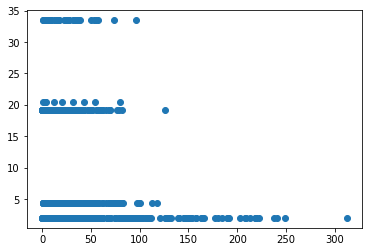

In [11]:
ax = plt.gca()
ax.scatter(y_data, relative_displacement_data)

## 1. Conceptial Analysis

### Basic terms: 

MTTF(Mean Time To Failure): the average amount of time a non-repairable asset operates before it fails

MTTF = (total number of hours of operations) / (number of non-repairable components in system)

MTBF(Mean Time Between Failure): The average time(hours) between system breakdowns

MTBF = (number of operational hours) / (number of failures)

### Good references:

http://www.reliabilityanalytics.com/blog/2011/08/31/poisson-distribution/

"bathtub curve"

Poisson Regression: rate $\lambda$ = $(length\ of\ time) \times (failure\ rate)$

length of  time would be in years

failure rate = $\lambda$

$MTBF = \frac{1}{\lambda}$

## Example Features

1. ship relative displacement($\frac{shipsize_i}{\textrm{min}(shipsize)}$)
2. oldest ship age within class. per-ship age is not available
3. propulsion method(CODOG, CODAG, etc)
4. number of diesel engines
5. diesel engine horsepower
6. effective power/weight ratio ($\frac{combined\_diesel\_HP}{displacement}$)
7. relative complexity(CODAD: 1, CODOG: 1.2, CODAG: 1.5). Values set at my discretion.
8. min-max scaled age $\frac{age - 1}{31 - 1}$, results in domain [0, 1]

### Assumptions

assumed failure count proportion based on propulsion system(my hypothesis):
~~CODAG > CODOG > CODAD~~ CODAD >>>> CODAG = CODOG

the older the ship, the more failure counts(may not be true. see bathtub curve)

~~engine size is proportional to ship size, hence larger engine means more complex system~~

propulsion system complexity - the more propulsion subsystems an engine has, the more prone it is to failures

### Example Model

$\lambda = earlyfailures + random failures + wearout$

early failures: related with engine type and complexity, exponentially decaying over age

random failures: unmeasurable, but believed to be proportional to complexity, deemed constant over age

wearout: ship age, operation uptime, complexity, exponentially increasing over age

## 2. Observational Space

For each ship $ship_i$ where $i = 1,2,3,...,99$, and $age = 1,2,3,...,31$ failure count $y_{i, age}$ is the failure count of $ship_i$ at its age since commision $age$

## 3. Construct Summary Statistic

skipping for now

## 4. Model Development

### input data:

age: min-max scaled age ($\frac{age - 1}{31 - 1}$, results in domain [0, 1])

ship: ship index(1~99)

relative_displacement: ($\frac{displacement_i}{\textrm{min}(displacement)} + 1$)

complexity: relative complexity (1, 1.2, 1.5)

engine: integer engine index

### model:
\begin{aligned}
y \sim \textrm{poisson}(\lambda_{ship,age})
\newline
\textrm{log} \ \lambda_{ship, age} = early_{ship, age} \times \textrm{failure_form}(age) + wear_{ship, age} \times \textrm{failure_form}(-age + 1) + \eta_{ship}
\newline
early_{ship, age} = complexity_{ship}  \times \alpha_{engine} + \beta_{ship} \ \textrm{ln} \ relative\_displacement
\newline
wear_{ship, age} = complexity_{ship} \times engine\_count \times \gamma_{engine} + \delta_{ship} \ \textrm{ln} \ relative\_displacement
\newline
\textrm{failure_form}(age) = \frac{\textrm{exp}(\phi)^{age} - 1}{\textrm{exp}(\phi) - 1}
\newline
\phi \sim \textrm{normal}(5, 2), \, \phi \in [1, \infty)
\newline
\alpha \sim \textrm{normal}(1.5, 1)
\newline
\beta \sim \textrm{normal}(0, 0.5)
\newline
\gamma \sim \textrm{normal}(0, 1)
\newline
\delta \sim \textrm{normal}(0, 0.5)
\newline
\eta \sim \textrm{normal}(0, 1)
\end{aligned}



## 5. Construct Summary Function

## 6. Simulate Bayesian Ensemble

The max observed failure count is 312. Therefore, $\lambda$ should be less than 6 ($\textrm{exp}(6) \approx 403$)

In [12]:
simu_ensemble_file = os.path.join("./models", "simu_bayesian_ensemble.stan")
simu_ensemble_model = pystan.StanModel(file=simu_ensemble_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_263098532058854c1a66c7d287f7822a NOW.


In [13]:
R = 1000
N = 1000
simu_age = 0.9
simu_relative_displacement = 2
simu_complexity = 1.3
simu_engine_count = 2
simu_data = {
    "N" : N,
    "age" : simu_age,
    "relative_displacement" : simu_relative_displacement,
    "complexity": simu_complexity,
    "engine_count" : simu_engine_count,
}
simu_ensemble_fit = simu_ensemble_model.sampling(iter=R, algorithm="Fixed_param", chains=1, data=simu_data)

In [14]:
simu_lambdas = simu_ensemble_fit.extract(pars=["lambda"])["lambda"]
simu_ys = simu_ensemble_fit.extract(pars=["y"])["y"]

In [15]:
np.mean(simu_lambdas[~np.isnan(simu_lambdas)])

1.1482023487207969

## 7. Prior Checks

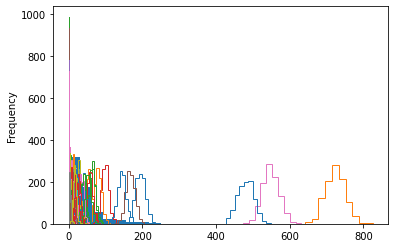

In [16]:
ax = plt.gca()
pd.Series(y_data).plot.hist(ax=ax)
for x in range(100):
    pd.Series(simu_ys[x]).plot.hist(ax=ax, histtype="step")


## 8. Configure Algorithm

use default settings

## 9. Fit Simulated Ensemble

In [17]:
fit_model_file = os.path.join("./models", "fit_data.stan")
fit_model = pystan.StanModel(fit_model_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_838312d0075c3b2db8f0fcf0672b5cf0 NOW.


In [18]:
%%time
post_lambda_zscore = []
post_lambda_contraction = []
prior_lambda_std = np.std(simu_lambdas[~np.isnan(simu_lambdas)], ddof=1)
prior_lambda_mean = np.mean(simu_lambdas[~np.isnan(simu_lambdas)])
for x in range(50):
    if np.any(np.isnan(simu_ys[x])): 
        print("skip", x)
        continue
    fit_model_data = {
        "N" : N,
        "y" : simu_ys[x].astype(np.int32),
        "complexity" : simu_complexity,
        "age" : simu_age,
        "engine_count" : simu_engine_count,
        "relative_displacement" : simu_relative_displacement,
    }
    fit_model_fit = fit_model.sampling(data=fit_model_data, chains=2, iter=1000)
    fit_lambda_summary = fit_model_fit.summary(pars="lambda")["summary"][0]
    post_lambda_mean = fit_lambda_summary[0]
    post_lambda_std = fit_lambda_summary[2]
    post_lambda_zscore.append((post_lambda_mean - simu_lambdas[x]) / prior_lambda_mean)
    post_lambda_contraction.append(1 - (post_lambda_std / prior_lambda_std) ** 2)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


skip 12


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


skip 23


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run a

CPU times: user 1.5 s, sys: 3.69 s, total: 5.19 s
Wall time: 6min 46s


## 10. Algorithmic Calibration

skipping, since per-fit diagnostic information are seen in step 9's output.

0 divergenecs during step 9!

## 11. Inferential Calibration

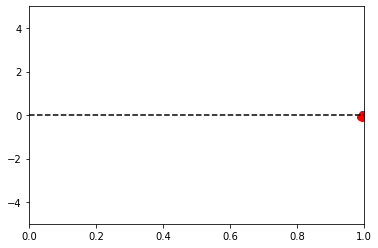

In [19]:
ax = plt.gca()
ax.set_xlim(0, 1)
ax.set_ylim(-5, 5)
ax.axhline(0, linestyle="--", c="black")
ax.scatter(post_lambda_contraction, post_lambda_zscore, c="r")

## 12. Fit Observed Data

In [20]:
post_pred_data = {
    "N" : y_data.shape[0],
    "engine_types" : np.max(ship_engine_type),
    "y" : y_data.astype(np.int32),
    "complexity" : ship_complexity_data,
    "age" : ship_age_data,
    "engine_type" : engine_data,
    "relative_displacement" : relative_displacement_data,
    "engine_count" : engine_count_data,
    "ship_number" : ship_number_data,
    "ship_number_max" : np.max(ship_number_data),
    "N_pred" : y_data.shape[0],
    "age_pred" : ship_age_data,
    "engine_type_pred" : engine_data,
    "complexity_pred" : ship_complexity_data,
    "relative_displacement_pred" : relative_displacement_data,
    "engine_count_pred" : engine_count_data,
    "ship_number_pred" : ship_number_data,
    
}

In [21]:
for key, val in post_pred_data.items():
    if isinstance(val, np.ndarray):
        print(key, val.shape)
    else:
        print(key, val)

N 614
engine_types 4
y (614,)
complexity (614,)
age (614,)
engine_type (614,)
relative_displacement (614,)
engine_count (614,)
ship_number (614,)
ship_number_max 99
N_pred 614
age_pred (614,)
engine_type_pred (614,)
complexity_pred (614,)
relative_displacement_pred (614,)
engine_count_pred (614,)
ship_number_pred (614,)


In [22]:
fit_data_model = pystan.StanModel(os.path.join("./models", "fit_data_post_pred.stan"))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bbd9761aacb17f94a3aecdb3338964c2 NOW.


In [23]:
%%time
fit_data_fit = fit_data_model.sampling(data=post_pred_data)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


CPU times: user 296 ms, sys: 318 ms, total: 614 ms
Wall time: 2min 1s


In [24]:
np.mean(fit_data_fit.extract(pars=["y_post_pred"])["y_post_pred"], axis=0).shape

(614,)

In [25]:
y_pred = np.mean(fit_data_fit.extract(pars=["y_post_pred"])["y_post_pred"], axis=0)

In [18]:
transformer = PowerTransformer()
unscaled_data = pd.read_csv("../data/y_count_original.csv")
unscaled_data.drop(columns="age", inplace=True)
transformer.fit(unscaled_data.values[~np.isnan(unscaled_data)].reshape(-1, 1))

PowerTransformer()

In [27]:
mean_squared_error(transformer.transform(y_data.reshape(-1, 1)).flatten(), transformer.transform(y_pred.reshape(-1, 1)).flatten())

0.49803488149298464

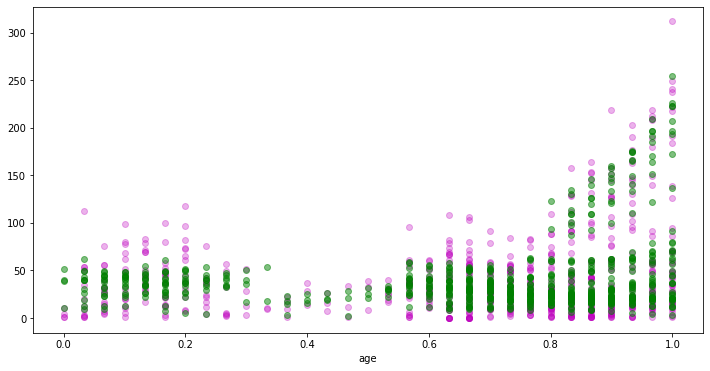

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('age')
ax.scatter(ship_age_data, y_data, color='m', alpha=0.3)
ax.scatter(ship_age_data, np.mean(fit_data_fit.extract(pars=["y_post_pred"])["y_post_pred"], axis=0), color="green", linewidth=1, alpha=0.5)

In [29]:
np.unique(ship_complexity_data)

array([1. , 1.3])

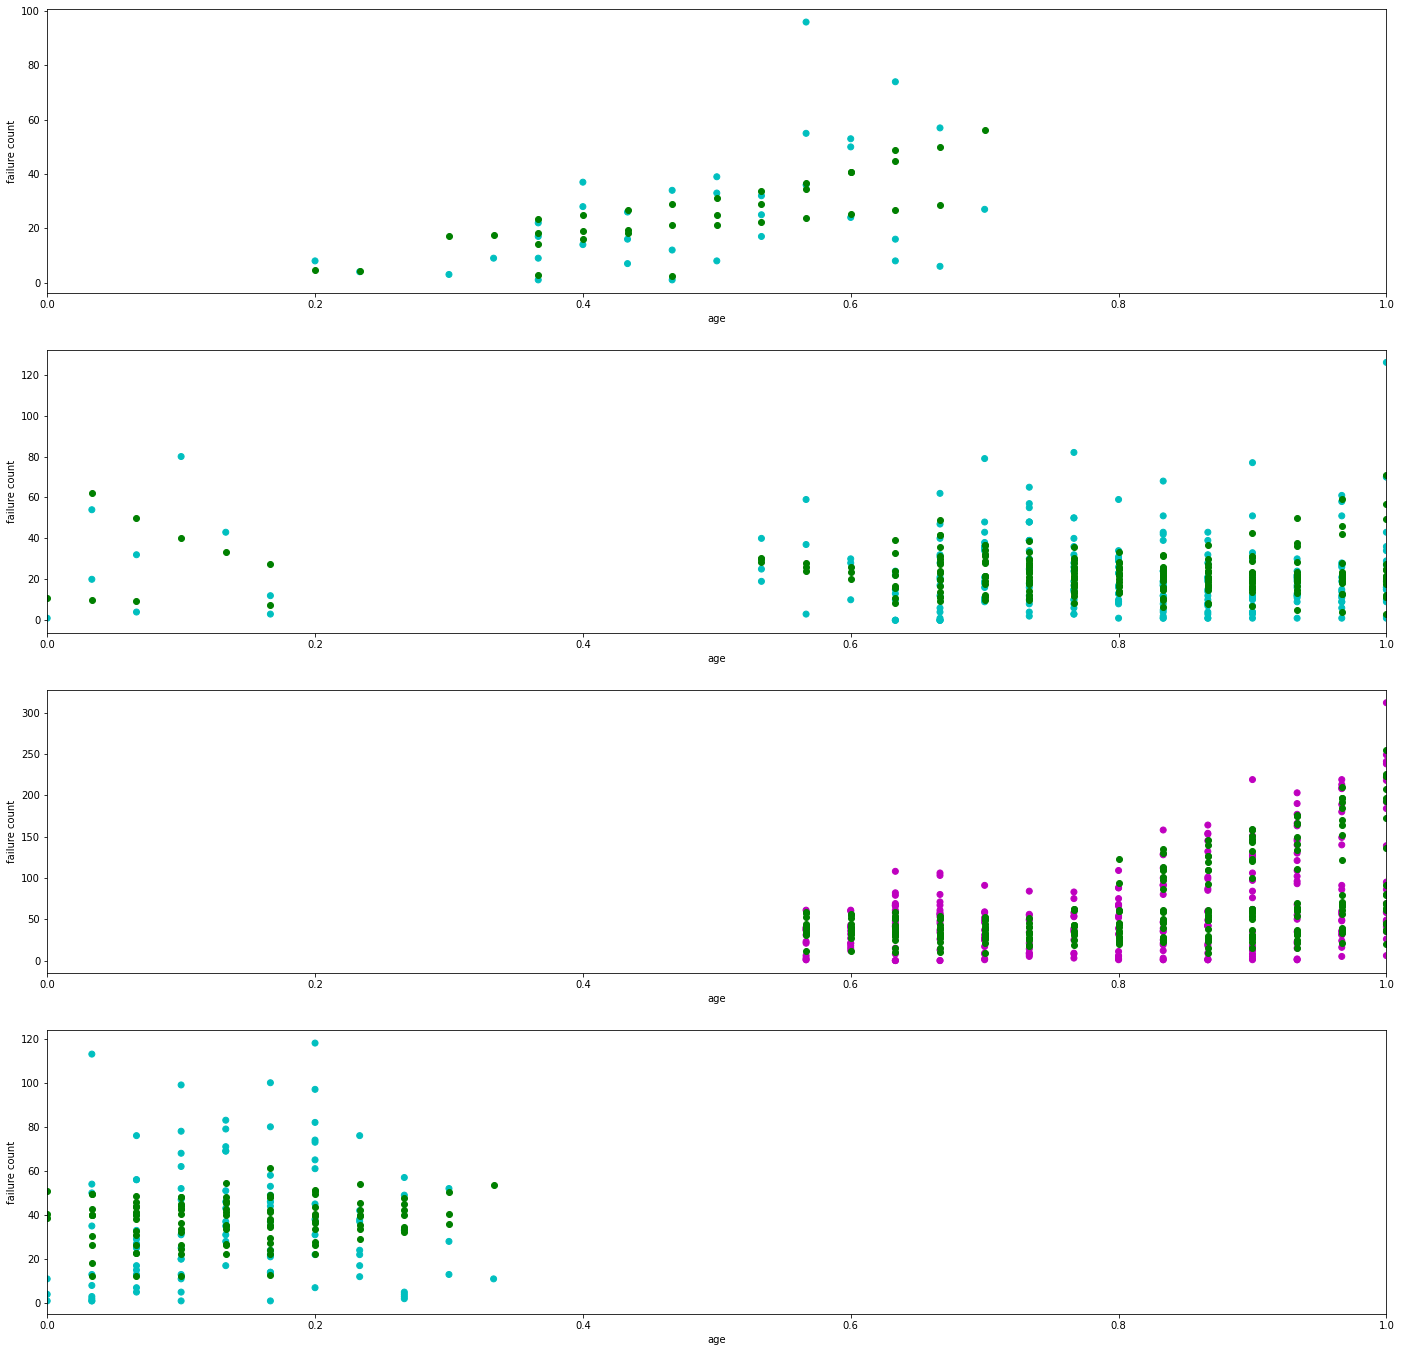

In [30]:
fig, ax = plt.subplots(4,1, figsize=(24, 24))
displacement_color = dict(zip(np.unique(relative_displacement_data), ("c", "m", "y", "b", "orange")))
complexity_color = dict(zip(np.unique(ship_complexity_data), ("c", "m", "b")))
#color = np.array([displacement_color[x] for x in relative_displacement_data])
color = np.array([complexity_color[x] for x in ship_complexity_data])
for x in range(1, 5):
    ax[x-1].set_xlabel('age')
    ax[x-1].set_ylabel('failure count')
    ax[x-1].set_xlim(0, 1)
    ax[x-1].scatter(ship_age_data[engine_data == x], y_data[engine_data == x], color=color[engine_data==x])
    ax[x-1].scatter(ship_age_data[engine_data == x], y_pred[engine_data == x], color="g")

# Second Iteration: Tweaking for better prediction accuracy

### Tweaking Model: Changing failure_form

The first model assumed that early failures and wearout shaped the same decay rate. This may not be the case so splitting $\phi$ into $\phi$ and $\rho$, each respectively for early and wear rates is worth a try

### input data:

age: min-max scaled age ($\frac{age - 1}{31 - 1}$, results in domain [0, 1])

ship: ship index(1~99)

relative_displacement: ($\frac{displacement_i}{\textrm{min}(displacement)}$)

complexity: relative complexity (1, 1.2, 1.5)

engine: integer engine index
### model:
\begin{aligned}
y \sim \textrm{poisson}(\lambda_{ship,age})
\newline
\textrm{log} \ \lambda_{ship, age} = early_{ship, age} \times \textrm{failure_form}(\phi, age) + wear_{ship, age} \times \textrm{failure_form}(\rho, -age + 1) + \eta_{ship}
\newline
early_{ship, age} = complexity_{ship}  \times \alpha_{engine} + \beta_{ship} \ \textrm{ln} \ relative\_displacement
\newline
wear_{ship, age} = complexity_{ship} \times engine\_count \times \gamma_{engine} + \delta_{ship} \ \textrm{ln} \ relative\_displacement
\newline
\textrm{failure_form}(shape, age) = \frac{\textrm{exp}(shape)^{age} - 1}{\textrm{exp}(shape) - 1}
\newline
\phi \sim \textrm{normal}(5, 2), \, \phi \in [1, \infty)
\newline
\rho \sim \textrm{normal}(5, 2), \, \rho \in [1, \infty)
\newline
\alpha \sim \textrm{normal}(1.5, 1)
\newline
\beta \sim \textrm{normal}(0, 0.5)
\newline
\gamma \sim \textrm{normal}(0, 1)
\newline
\delta \sim \textrm{normal}(0, 0.5)
\newline
\eta \sim \textrm{normal}(0, 1)
\end{aligned}

## 6. Simulate Bayesian Ensemble

In [31]:
simu_ensemble_file = os.path.join("./models", "simu_bayesian_ensemble-iter2.stan")
simu_ensemble_model = pystan.StanModel(file=simu_ensemble_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6d3a31b59352dd4152fa122efb65de9f NOW.


In [32]:
R = 1000
N = 1000
simu_age = 1
simu_relative_displacement = 1
simu_complexity = 1.5
simu_engine_count = 2
simu_data = {
    "N" : N,
    "age" : simu_age,
    "relative_displacement" : simu_relative_displacement,
    "complexity": simu_complexity,
    "engine_count" : simu_engine_count,
}
simu_ensemble_fit = simu_ensemble_model.sampling(iter=R, algorithm="Fixed_param", chains=1, data=simu_data)

In [33]:
simu_lambdas = simu_ensemble_fit.extract(pars=["lambda"])["lambda"]
simu_ys = simu_ensemble_fit.extract(pars=["y"])["y"]

In [34]:
np.mean(simu_lambdas[~np.isnan(simu_lambdas)])

1.3910902212236231

## 7. Prior Checks

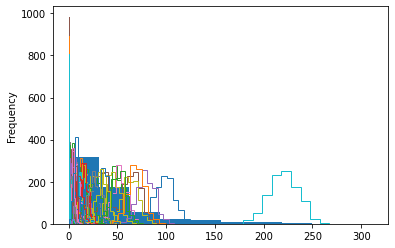

In [35]:
ax = plt.gca()
pd.Series(y_data).plot.hist(ax=ax)
for x in range(100):
    pd.Series(simu_ys[x]).plot.hist(ax=ax, histtype="step")


## 8. Configure Algorithm

## 9. Fit Simulated Ensemble

In [36]:
fit_model_file = os.path.join("./models", "fit_data-iter2.stan")
fit_model = pystan.StanModel(fit_model_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_eb94499c6a205333f9be573dc83a79e8 NOW.


In [37]:
%%time
post_lambda_zscore = []
post_lambda_contraction = []
prior_lambda_std = np.std(simu_lambdas[~np.isnan(simu_lambdas)], ddof=1)
prior_lambda_mean = np.mean(simu_lambdas[~np.isnan(simu_lambdas)])
for x in range(50):
    if np.any(np.isnan(simu_ys[x])): 
        print("skip", x)
        continue
    fit_model_data = {
        "N" : N,
        "y" : simu_ys[x].astype(np.int32),
        "complexity" : simu_complexity,
        "age" : simu_age,
        "engine_count" : simu_engine_count,
        "relative_displacement" : simu_relative_displacement,
    }
    fit_model_fit = fit_model.sampling(data=fit_model_data, chains=2, iter=1000)
    fit_lambda_summary = fit_model_fit.summary(pars="lambda")["summary"][0]
    post_lambda_mean = fit_lambda_summary[0]
    post_lambda_std = fit_lambda_summary[2]
    post_lambda_zscore.append((post_lambda_mean - simu_lambdas[x]) / prior_lambda_mean)
    post_lambda_contraction.append(1 - (post_lambda_std / prior_lambda_std) ** 2)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


skip 6


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run a

skip 42


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


skip 46


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


CPU times: user 1.56 s, sys: 5.31 s, total: 6.87 s
Wall time: 6min 15s


## 10. Algorithmic Calibration

## 11. Inferential Calibration

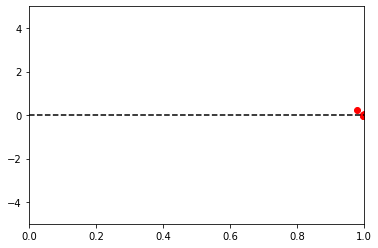

In [38]:
ax = plt.gca()
ax.set_xlim(0, 1)
ax.set_ylim(-5, 5)
ax.axhline(0, linestyle="--", c="black")
ax.scatter(post_lambda_contraction, post_lambda_zscore, c="r")

## 12. Fit Observed Data

In [12]:
post_pred_data = {
    "N" : y_data.shape[0],
    "engine_types" : np.max(ship_engine_type),
    "y" : y_data.astype(np.int32),
    "complexity" : ship_complexity_data,
    "age" : ship_age_data,
    "engine_type" : engine_data,
    "relative_displacement" : relative_displacement_data,
    "engine_count" : engine_count_data,
    "ship_number" : ship_number_data,
    "ship_number_max" : np.max(ship_number_data),
    "N_pred" : y_data.shape[0],
    "age_pred" : ship_age_data,
    "engine_type_pred" : engine_data,
    "complexity_pred" : ship_complexity_data,
    "relative_displacement_pred" : relative_displacement_data,
    "engine_count_pred" : engine_count_data,
    "ship_number_pred" : ship_number_data,
    
}

In [13]:
for key, val in post_pred_data.items():
    if isinstance(val, np.ndarray):
        print(key, val.shape)
    else:
        print(key, val)

N 614
engine_types 4
y (614,)
complexity (614,)
age (614,)
engine_type (614,)
relative_displacement (614,)
engine_count (614,)
ship_number (614,)
ship_number_max 99
N_pred 614
age_pred (614,)
engine_type_pred (614,)
complexity_pred (614,)
relative_displacement_pred (614,)
engine_count_pred (614,)
ship_number_pred (614,)


In [11]:
fit_data_model = pystan.StanModel(os.path.join("./models", "fit_data_post_pred-iter2.stan"))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fbd4c26214ed841b56792d2558ed6dbf NOW.


In [14]:
%%time
fit_data_fit = fit_data_model.sampling(data=post_pred_data)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


CPU times: user 203 ms, sys: 272 ms, total: 475 ms
Wall time: 1min 52s


In [15]:
print(fit_data_fit.stansummary(pars=["phi", "rho"]))

Inference for Stan model: anon_model_fbd4c26214ed841b56792d2558ed6dbf.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

      mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
phi   1.73  4.9e-3   0.14   1.46   1.63   1.73   1.83   2.02    866    1.0
rho   1.01  1.6e-4   0.01    1.0    1.0   1.01   1.02   1.05   7059    1.0

Samples were drawn using NUTS at Wed Sep 16 22:59:19 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [16]:
y_pred = np.mean(fit_data_fit.extract(pars=["y_post_pred"])["y_post_pred"], axis=0)

In [19]:
mean_squared_error(transformer.transform(y_data.reshape(-1, 1)).flatten(), transformer.transform(y_pred.reshape(-1, 1)).flatten())

0.4941771767757057

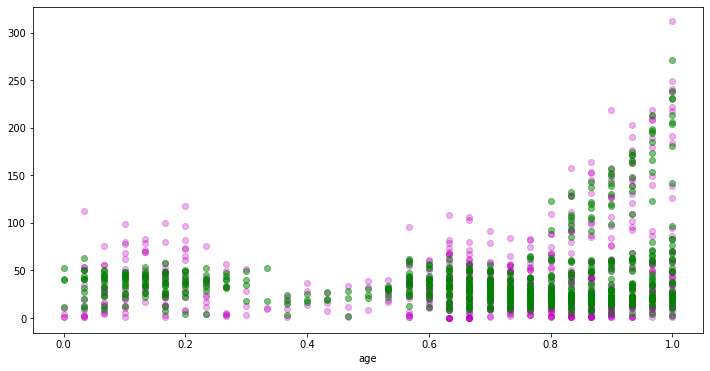

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('age')
ax.scatter(ship_age_data, y_data, color='m', alpha=0.3)
ax.scatter(ship_age_data, np.mean(fit_data_fit.extract(pars=["y_post_pred"])["y_post_pred"], axis=0), color="green", linewidth=1, alpha=0.5)

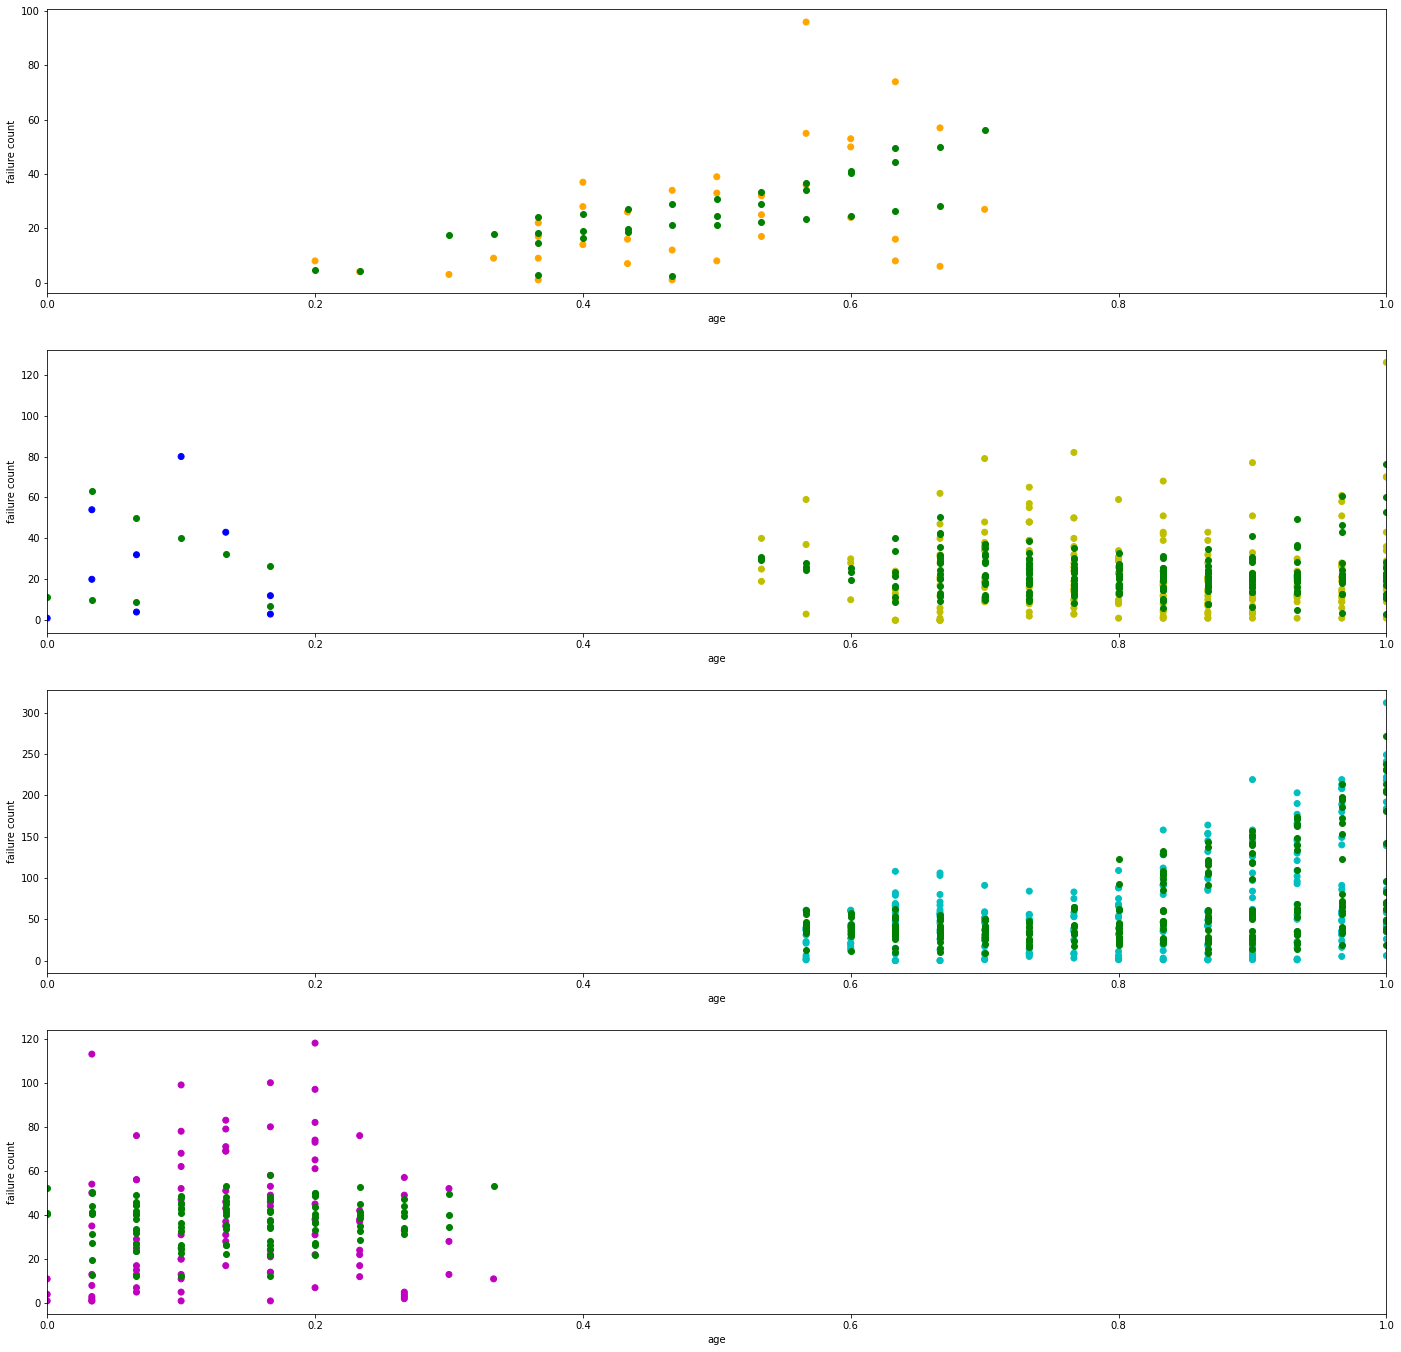

In [21]:
fig, ax = plt.subplots(4,1, figsize=(24, 24))
displacement_color = dict(zip(np.unique(relative_displacement_data), ("c", "m", "y", "b", "orange")))
complexity_color = dict(zip(np.unique(ship_complexity_data), ("c", "m", "b")))
color = np.array([displacement_color[x] for x in relative_displacement_data])
#color = np.array([complexity_color[x] for x in ship_complexity_data])
for x in range(1, 5):
    ax[x-1].set_xlabel('age')
    ax[x-1].set_ylabel('failure count')
    ax[x-1].set_xlim(0, 1)
    ax[x-1].scatter(ship_age_data[engine_data == x], y_data[engine_data == x], color=color[engine_data==x])
    ax[x-1].scatter(ship_age_data[engine_data == x], y_pred[engine_data == x], color="g")